___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7


#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](attachment:./www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
#Відкрийте файл та виведіть описову статистику

data = pd.read_csv('loan_data.csv')
data.describe() #виводимо описову статистику

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


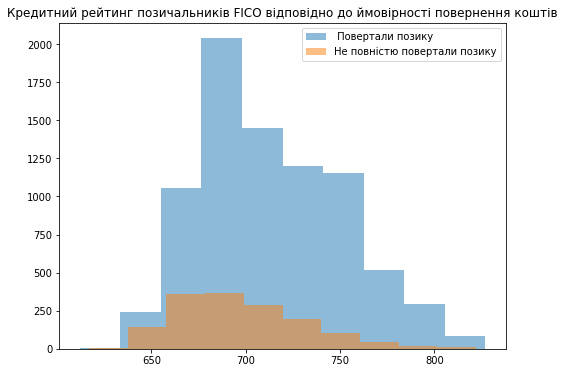

In [3]:
#Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1)

fig = plt.figure(figsize=(8, 6))
plt.hist(data[data['not.fully.paid'] == 0]['fico'], bins=10, alpha=0.5, label=' Повертали позику')

plt.hist(data[data['not.fully.paid'] == 1]['fico'], bins=10, alpha=0.5, label='Не повністю повертали позику')

plt.legend(loc='upper right')
plt.title('Кредитний рейтинг позичальників FICO відповідно до ймовірності повернення коштів')
plt.show()

# З гістограми наглядно бачимо що чим вищий кредитний рейтинг позичальника тим більша ймовірність, що він поверне позику

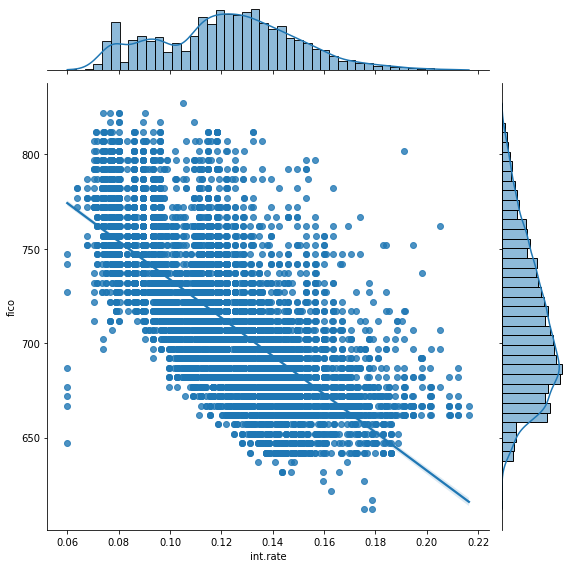

In [4]:
#3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

sns.jointplot(x='int.rate', y='fico', data=data[['int.rate', 'fico']], kind='reg', height=8, ratio=6)
plt.show()

# На графіку ми бачимо негативну тенденцію.
# Оскільки позичальники з нищим рейтингом з більшою ймовірністю не повернуть позику = більший ризик > більша ставка int rate
# Але (!) є певні позичальники з хорошим рейтингами FICO але їм були призначена висока процентна ставка позики 

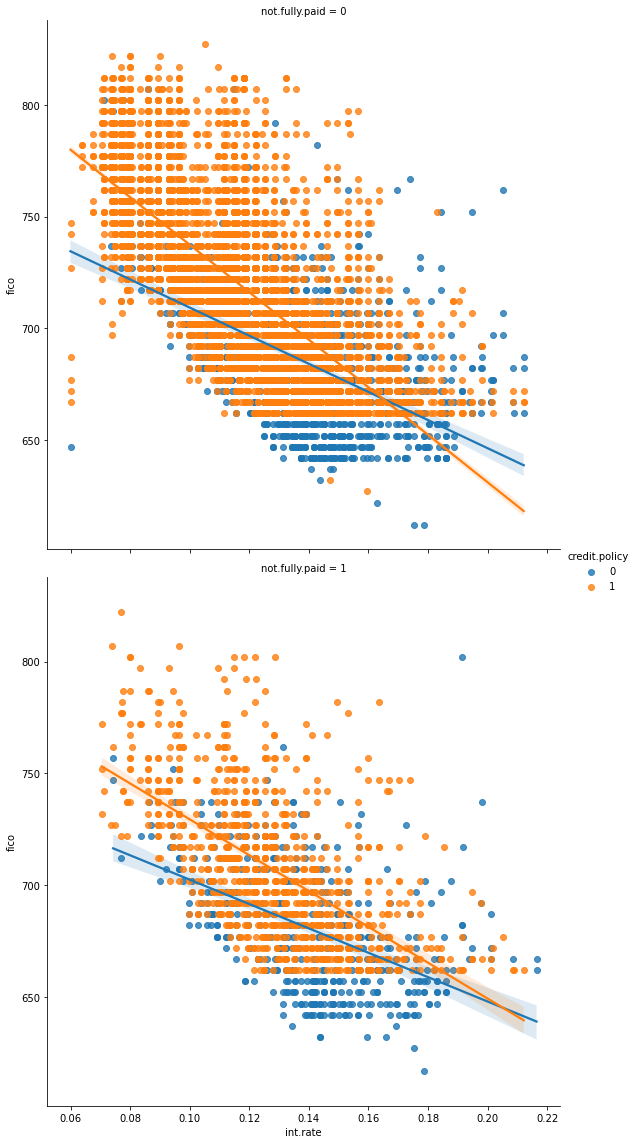

In [87]:
#4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy.
# Розбийте по значеннях цільової функції 
sns.lmplot(x='int.rate', y='fico', data=data, hue='credit.policy', row= 'not.fully.paid', height=8)

plt.show()

In [5]:
#5. purpose є категорієї, тперетворюємо за допомогою pd.get_dummies
data = pd.get_dummies(data, columns=['purpose'])
data.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0


In [257]:
# Створюємо вибірку для наших моделей

# Рядки зі значенням 0 і взяти 50% рядків
df_zeros = data[data['not.fully.paid'] == 0].sample(frac=0.20)

# Рядки зі значенням 1 і взяти 20% рядків
df_ones = data[data['not.fully.paid'] == 1].sample(frac=0.8)

# Об'єднати вибрані рядки в один датафрейм
sample = pd.concat([df_zeros, df_ones])

sample['not.fully.paid'].value_counts()

0 1609
1 1226
Name: not.fully.paid, dtype: int64

In [258]:
data['not.fully.paid'].value_counts()

0 8045
1 1533
Name: not.fully.paid, dtype: int64

In [259]:
#6. Розбийте датасет на тестві та трейнові дані

X_train = sample.drop('not.fully.paid', axis=1)
y_train = sample['not.fully.paid']

X_test = data.drop('not.fully.paid', axis=1)
y_test = data['not.fully.paid']

In [261]:
#7.1 Модель дерево рішень

model1 = DecisionTreeClassifier(random_state=15,
                                max_depth = 15)

model1.fit(X_train, y_train)
y_pred_DT = model1.predict(X_test)

In [262]:
# 8.1 Матриця та основні метрики для моделі Дерево рішень

conf_matrix_forDT = confusion_matrix(y_test, y_pred_DT)  #Матриця помилок
conf_matrix_forDT = conf_matrix_forDT.reshape(1, -1)
cm1 = pd.DataFrame(conf_matrix_forDT, columns=['True Positive', 'False Positive', 'False Negative', 'True Negative'])
cm1.index = ['Decision tree']
cm1

,True Positive,False Positive,False Negative,True Negative
Decision tree,5844,2201,368,1165


In [263]:
precision1, recall1, f1_score1, support1 = precision_recall_fscore_support(y_test, y_pred_DT)
metrics_model1 = pd.DataFrame({'precision': precision1, 'recall': recall1, 'f1_score': f1_score1, 'support': support1},
                              index=[0, 1])

print(precision1, recall1, f1_score1, support1)

[0.94075982 0.34610814] [0.72641392 0.75994781] [0.81980781 0.47560727] [8045 1533]


[Text(385.57019492056855, 1053.2250000000001, 'int.rate <= 0.093\ngini = 0.491\nsamples = 2835\nvalue = [1609, 1226]\nclass = n'),
 Text(66.1196174749164, 985.2750000000001, 'log.annual.inc <= 9.635\ngini = 0.3\nsamples = 398\nvalue = [325, 73]\nclass = n'),
 Text(36.546822742474916, 917.325, 'revol.bal <= 2452.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = o'),
 Text(33.43645484949833, 849.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = o'),
 Text(39.65719063545151, 849.375, 'revol.util <= 36.2\ngini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = n'),
 Text(36.546822742474916, 781.425, 'dti <= 14.845\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = o'),
 Text(33.43645484949833, 713.475, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = o'),
 Text(39.65719063545151, 713.475, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = n'),
 Text(42.7675585284281, 781.425, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = n'),
 Text(95.69241220735786, 917.325, 'revol.util <= 80.0\

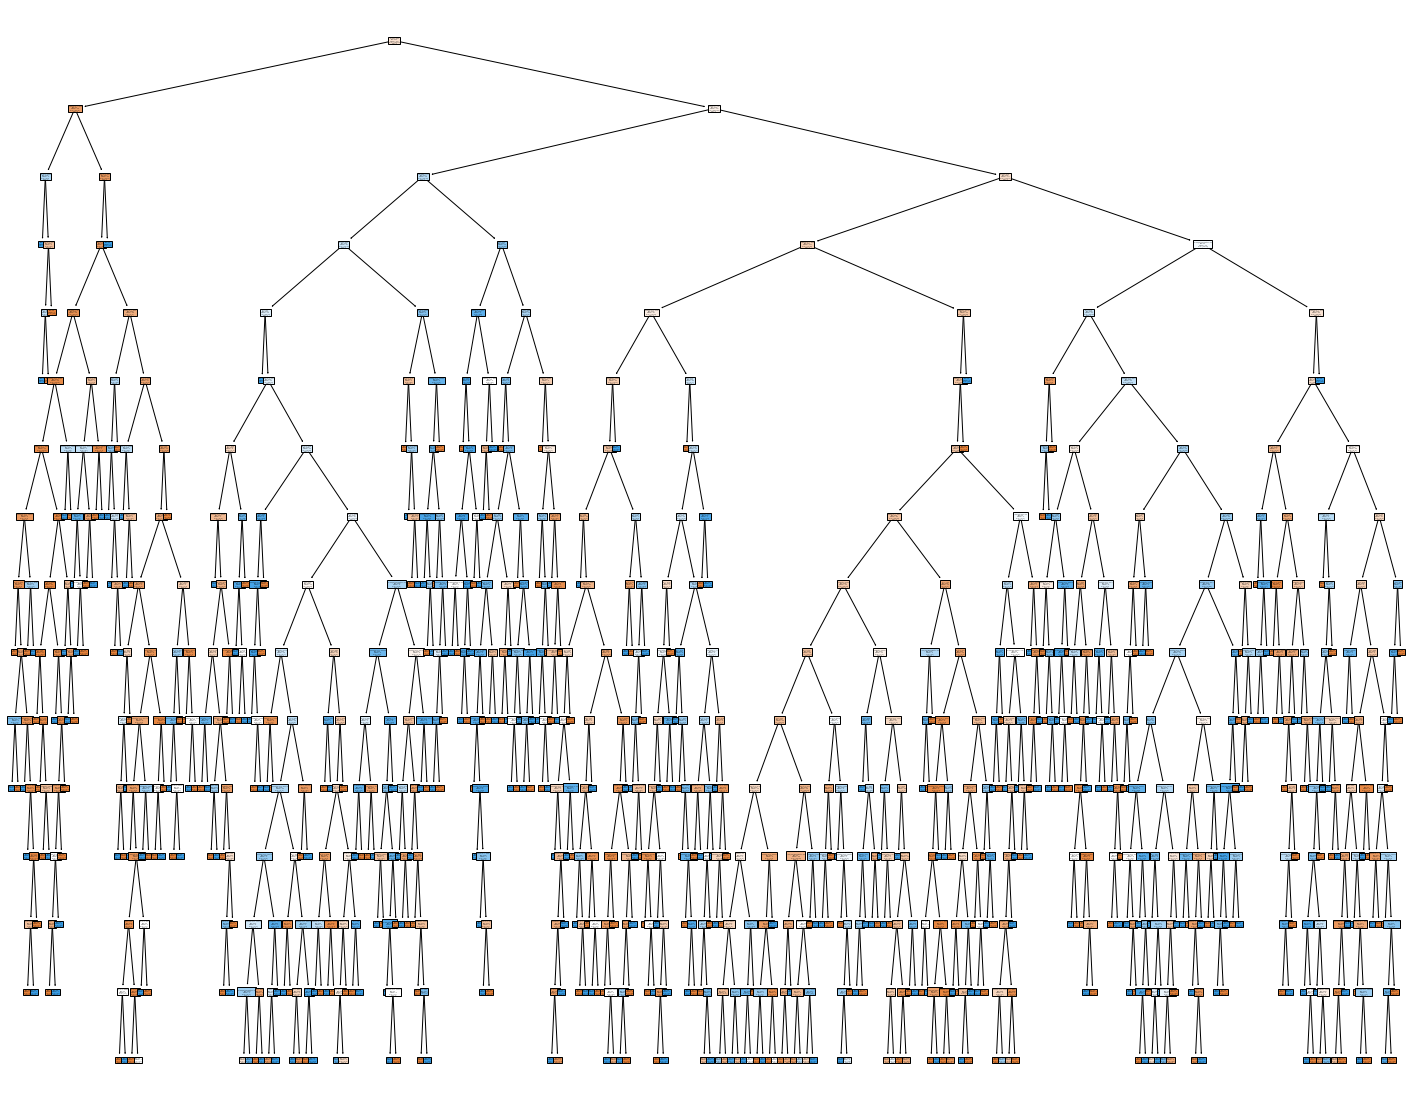

In [264]:
fig = plt.figure(figsize=(25,20))

plot_tree(model1, feature_names=X_train.columns.tolist(), class_names='not.fully.paid',
               filled=True)

In [243]:
#7.2 Логістична регресія

model2 = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_LR = model2.predict(X_test)

In [244]:
#8.2 Матриця та основні метрики для моделі лінійної регресії
conf_matrix_forLR = confusion_matrix(y_test, y_pred_LR)
conf_matrix_forLR = conf_matrix_forLR.reshape(1, -1)

cm2 = pd.DataFrame(conf_matrix_forLR, columns=['True Positive', 'False Positive', 'False Negative', 'True Negative'])
cm2.index = ['Logistic regression']
cm2

,True Positive,False Positive,False Negative,True Negative
Logistic regression,7316,729,1203,330


In [266]:
precision2, recall2, f1_score2, support2 = precision_recall_fscore_support(y_test, y_pred_LR)
metrics_model2 = pd.DataFrame({'precision': precision2, 'recall': recall2, 'f1_score': f1_score2, 'support': support2},
                              index=[0, 1])

print(precision2, recall2, f1_score2, support2)

[0.85878624 0.31161473] [0.90938471 0.21526419] [0.88336151 0.25462963] [8045 1533]


In [271]:
#7.3 Random forest

# визначаємо модель Random Forest з 100 деревами і обмеженням глибини дерева до max_depthрівнів
model3 = RandomForestClassifier(n_estimators=700, max_depth=50, random_state=0)

# навчаємо модель на тренувальній вибірці
model3.fit(X_train, y_train)

# здійснюємо передбачення на тестовій вибірці
y_pred_Rf = model3.predict(X_test)

In [272]:
#8.3 Матриця та основні метрики для моделі Random forest
conf_matrix_forRF = confusion_matrix(y_test, y_pred_Rf) 
conf_matrix_forRF = conf_matrix_forRF.reshape(1, -1)

cm3 = pd.DataFrame(conf_matrix_forRF, columns=['True Positive', 'False Positive', 'False Negative', 'True Negative'])
cm3.index = ['Random forest']
cm3

,True Positive,False Positive,False Negative,True Negative
Random forest,6397,1648,174,1359


In [273]:
precision3, recall3, f1_score3, support3 = precision_recall_fscore_support(y_test, y_pred_Rf)
metrics_model3 = pd.DataFrame({'precision': precision3, 'recall': recall3, 'f1_score': f1_score3, 'support': support3},
                              index=[0, 1])

print(precision3, recall3, f1_score3, support3)

[0.97352001 0.45194546] [0.79515227 0.88649706] [0.87534209 0.59867841] [8045 1533]


In [274]:
#7.4 XGBoost

model4 = XGBClassifier(use_label_encoder=False)
model4.fit(X_train, y_train)

# Здійснюємо класифікацію на тестових даних та виводимо accuracy
y_pred_XGB = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_XGB)

[22:50:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [275]:
#8.4  Матриця та основні метрики для моделі XGBoost
conf_matrix_forXGB = confusion_matrix(y_test, y_pred_XGB) 
conf_matrix_forXGB = conf_matrix_forXGB.reshape(1, -1)

cm4 = pd.DataFrame(conf_matrix_forXGB, columns=['True Positive', 'False Positive', 'False Negative', 'True Negative'])
cm4.index = ['XGBoost']
cm4

,True Positive,False Positive,False Negative,True Negative
XGBoost,6091,1954,181,1352


In [276]:
precision4, recall4, f1_score4, support4 = precision_recall_fscore_support(y_test, y_pred_XGB)
metrics_model4 = pd.DataFrame({'precision': precision4, 'recall': recall4, 'f1_score': f1_score4, 'support': support4},
                              index=[0, 1])

print(precision4, recall4, f1_score4, support4)

[0.97114158 0.40895342] [0.75711622 0.88193085] [0.85087658 0.55879314] [8045 1533]


In [221]:
# 9. Використайте ансамбель voting для всіх моделей

In [277]:
model_voting = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('rf', model3), ('xgb', model4)], voting='hard')

model_voting.fit(X_train, y_train)

y_pred_voting = model_voting.predict(X_test)

[22:50:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [278]:
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting) 
conf_matrix_voting = conf_matrix_voting.reshape(1, -1)

cm_voting = pd.DataFrame(conf_matrix_voting, columns=['True Positive', 'False Positive', 'False Negative', 'True Negative'])
cm_voting.index = ['Aнсамбель Voting']
cm_voting

,True Positive,False Positive,False Negative,True Negative
Aнсамбель Voting,6937,1108,359,1174


In [279]:
precision5, recall5, f1_score5, support5 = precision_recall_fscore_support(y_test, y_pred_voting)
metrics_model5 = pd.DataFrame({'precision': precision5, 'recall': recall5, 'f1_score': f1_score5, 'support': support5},
                              index=[0, 1])

print(precision5, recall5, f1_score5, support5)

[0.95079496 0.514461  ] [0.8622747  0.76581866] [0.9043739  0.61546527] [8045 1533]


In [225]:
# 10. Порівняйте результати моделей та зробіть висновки

In [280]:
# Порівнюємо матриці помилок моделей

comparison_matrix = pd.concat([cm1, cm2, cm3, cm4, cm_voting]) #створюємо обєднюючу таблицю 
comparison_matrix

,True Positive,False Positive,False Negative,True Negative
Decision tree,5844,2201,368,1165
Logistic regression,7316,729,1203,330
Random forest,6397,1648,174,1359
XGBoost,6091,1954,181,1352
Aнсамбель Voting,6937,1108,359,1174


In [281]:
# Таблиця для порівняння основних метрик моделей
basic_metrics = pd.concat([metrics_model1, metrics_model2, metrics_model3, metrics_model4, metrics_model5])
basic_metrics = basic_metrics.round(2)
basic_metrics = basic_metrics.reset_index().rename(columns={'index': 'class'})
basic_metrics = basic_metrics.rename(index={0: 'Decision tree', 1: 'Decision tree',
                                            2: 'Logistic regression', 3: 'Logistic regression',
                                            4: 'Random forest', 5: 'Random forest',
                                            6: 'XGBoost', 7: 'XGBoost',
                                            8: 'Aнсамбель Voting', 9: 'Aнсамбель Voting'})

basic_metrics

,class,precision,recall,f1_score,support
Decision tree,0,0.94,0.73,0.82,8045
Decision tree,1,0.35,0.76,0.48,1533
Logistic regression,0,0.86,0.91,0.88,8045
Logistic regression,1,0.31,0.22,0.25,1533
Random forest,0,0.97,0.80,0.88,8045
Random forest,1,0.45,0.89,0.60,1533
XGBoost,0,0.97,0.76,0.85,8045
XGBoost,1,0.41,0.88,0.56,1533
Aнсамбель Voting,0,0.95,0.86,0.90,8045
Aнсамбель Voting,1,0.51,0.77,0.62,1533


TP - вірно визначені клас 1 - позичальник які не повністю повернули борг

FP - невірно визначені - позичальники класу 0, які модель визначила як клас 1

FN - позичальник клас 1, які модель віднесла до класу 0

TN - вірно визначені позичальник класу 0, що повернули позику

Якщо у False Negative є значення більше 0, це означає, що модель помилково прогнозувала клас 0 (від'ємний результат), тоді як в дійсності повинен був бути клас 1 (позитивний результат) для цих випадків.

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [27]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [28]:
import pandas as pd
df = pd.read_csv(url, delimiter=',') 

In [29]:
# 1. Cписок унікальних міст з датасету
df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [30]:
# 2. Виведіть дату початку та кінця ведення даних

df['date.utc'] = pd.to_datetime(df['date.utc'])
start_date = df['date.utc'].dt.date.min()
finish_date = df['date.utc'].dt.date.max()

print(f'Дату початку ведення даних: {start_date}. \nДата кінця ведення данних: {finish_date}.')

Дату початку ведення даних: 2019-05-07. 
Дата кінця ведення данних: 2019-06-21.


In [31]:
# 3. Средня конценрація NO2 для кожного дня тижня і міста

df['day'] = df['date.utc'].dt.day_name() # створюємо окремий стовпець з днем тижня

mean_by_day = df.pivot_table(values='value', index='city', columns='day', aggfunc='mean') # створюємо таблицю з середнім
mean_by_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
city,,,,,,,
Antwerpen,28.400000,27.875000,33.500000,21.896552,27.500000,22.214286,21.125000
London,26.446809,23.969697,24.977612,24.859155,24.780142,24.885714,23.460432
Paris,31.617986,24.856250,25.266154,23.274306,28.600690,30.999359,29.165753


In [32]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_by_day = mean_by_day.reindex(columns=days) # сортуємо стовпці за вірним порядком днів тижня
mean_by_day

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
city,,,,,,,
Antwerpen,27.875000,22.214286,21.125000,27.500000,28.400000,33.500000,21.896552
London,23.969697,24.885714,23.460432,24.780142,26.446809,24.977612,24.859155
Paris,24.856250,30.999359,29.165753,28.600690,31.617986,25.266154,23.274306


In [33]:
# 4. Знаходимо середнє значення для кожної години

df['hour'] = df['date.utc'].dt.hour # створюємо окремий стовпець з годинами вимірювання
mean_by_hour = df.pivot_table(values='value', index='city', columns='hour', aggfunc='mean')
mean_by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
city,,,,,,,,,,,,,,,,,,,,,
Antwerpen,24.750000,25.838235,21.000000,21.333333,24.833333,29.500000,33.333333,37.666667,34.833333,27.666667,...,23.750000,29.250000,17.500000,18.500000,25.500000,30.750000,27.500000,25.750000,26.500000,23.000000
London,24.292683,24.757576,21.800000,21.536585,18.976190,19.048780,20.976190,21.452381,21.238095,21.857143,...,25.900000,28.682927,28.951220,30.073171,30.121951,29.560976,29.121951,28.853659,28.969697,28.414634
Paris,31.683333,27.433333,25.964286,25.234211,27.257895,35.534211,40.102381,40.569767,36.458140,30.076744,...,17.772093,18.854762,21.266667,23.585714,24.204762,26.635714,29.707143,33.237209,35.400000,34.288095


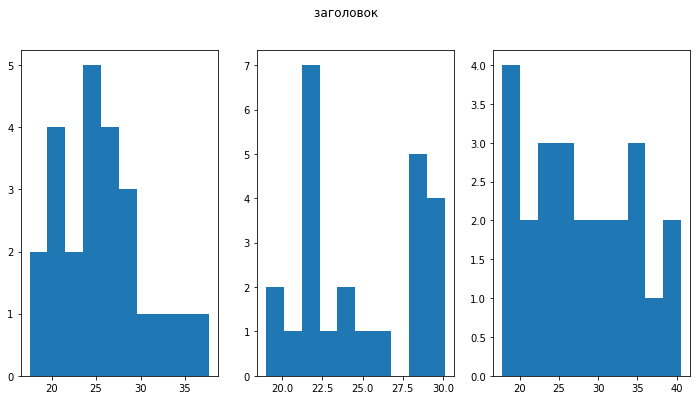

In [34]:
# Виводимо стовпчикову діаграму

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle(' заголовок')

axs[0].hist(mean_by_hour.loc['Antwerpen'])

axs[1].hist(mean_by_hour.loc['London'])

axs[2].hist(mean_by_hour.loc['Paris'])


# показуємо діаграму
plt.show()